In [158]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
df=pd.read_csv('clean.csv')

(478709, 12)

Number of songs per decade

decade
2010.0    185492
2000.0     93549
2020.0     53594
1990.0     42474
1980.0     19411
1970.0     16110
1960.0      9488
1950.0      1748
1940.0       148
1930.0        83
1920.0        49
1890.0        28
1900.0         5
1910.0         2
Name: count, dtype: int64


Text(0, 0.5, 'Number of Songs')

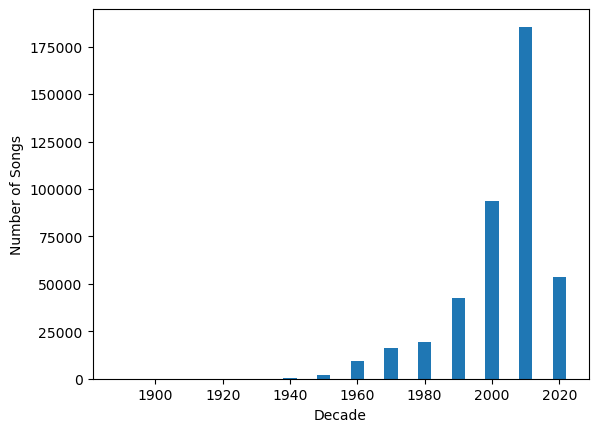

In [195]:
yrs=df['decade'].value_counts()
print(yrs)
plt.bar(yrs.index,yrs,width=4)
plt.xlabel('Decade')
plt.ylabel('Number of Songs')

Number of songs per genre

main_genre
pop            85185
rock           67238
country        53306
alternative    47252
pop rock       39557
punk           16066
metal          11315
rap            11186
soul            7350
jazz            7001
reggae          3841
electronic      2814
Name: count, dtype: int64


Text(0, 0.5, 'Main Genre')

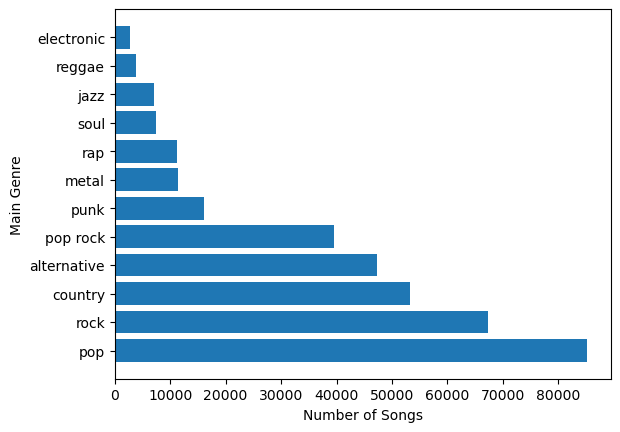

In [194]:
grs=df['main_genre'].value_counts()
print(grs)
plt.barh(grs.index,grs)
plt.xlabel('Number of Songs')
plt.ylabel('Main Genre')

Number of songs per number of sections:

In [ ]:
secs=df['num_sections'].value_counts()
print(secs)

478709


There are some crazy outliers, some songs have 100+ sections. Plot only those $\leq$ 20 sections, which end up comprising more than 99% of the data.

num_sections
1     187592
7      56574
6      50516
8      46168
5      33734
9      28772
4      22404
10     15667
3      11146
2       8980
11      7966
12      4058
13      2069
14      1087
15       575
16       424
17       208
18       147
20        75
19        74
Name: count, dtype: int64
478236


Text(0, 0.5, 'Main Genre')

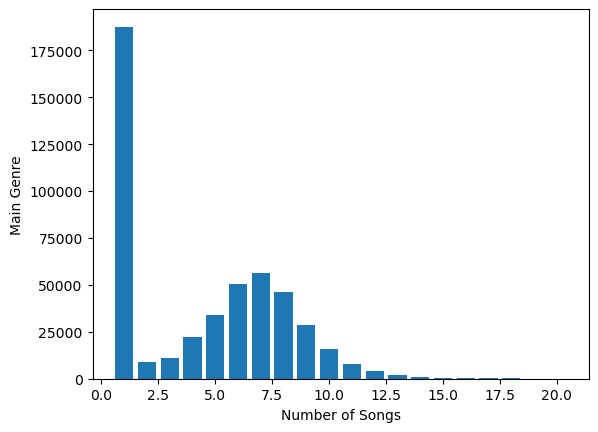

In [ ]:
secs=df[df['num_sections']<=20].num_sections.value_counts()
print(secs)
print(secs.sum()) #accounts for over 99.9% of data
plt.bar(secs.index,secs)
plt.ylabel('Number of Songs')
plt.xlabel('Number of Sections')

Songs per total unique chords:

In [224]:
uchords=df.tot_unique_chords.value_counts()
print(uchords)

tot_unique_chords
4      92728
5      87065
6      71212
7      50166
3      42040
       ...  
114        1
86         1
104        1
93         1
90         1
Name: count, Length: 103, dtype: int64


Again, some huge outliers. Limit plot to songs with $\leq$ 40 unique chords, which account for over 99.8% of all data.

tot_unique_chords
4     92728
5     87065
6     71212
7     50166
3     42040
8     34191
9     23599
10    17016
11    12223
12     9056
13     6686
2      6301
14     5152
15     3874
16     3002
17     2459
18     1936
19     1566
20     1267
21     1057
22      838
23      721
24      596
25      509
26      416
27      340
28      337
29      248
30      226
31      192
32      178
33      143
34      134
35      131
36      114
1       108
37       95
38       82
39       80
40       56
Name: count, dtype: int64
478140


Text(0.5, 0, 'Number of Unique Chords')

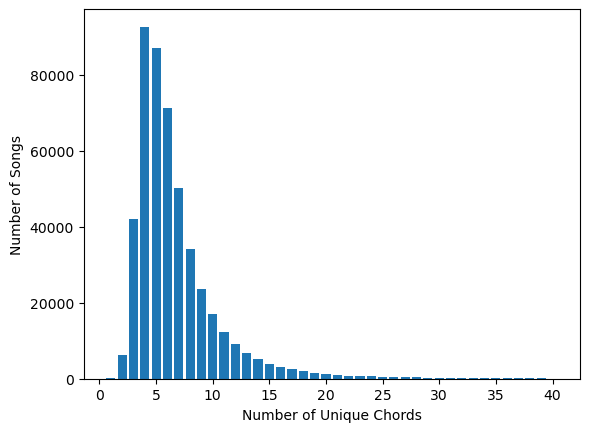

In [227]:

uchords=df[df['tot_unique_chords']<=40].tot_unique_chords.value_counts()
print(uchords)
print(uchords.sum()) #accounts for over 99.8% of data
plt.bar(uchords.index,uchords)
plt.ylabel('Number of Songs')
plt.xlabel('Number of Unique Chords')

Songs by total number of chords:

In [ ]:
tchords=df.tot_chords.value_counts()
print(tchords)


tot_chords
72      5942
64      5932
60      5901
56      5689
61      5591
        ... 
725        1
1086       1
722        1
376        1
537        1
Name: count, Length: 933, dtype: int64


Once again, large outliers. Restrict plot to songs using $\leq$ 300 chords, which comprise more than 99.7% of total data. Since this feature is more continuous than the others, use histrogram instead of bar plot.

tot_chords
72     5942
64     5932
60     5901
56     5689
61     5591
       ... 
300       7
284       6
295       5
281       5
299       3
Name: count, Length: 300, dtype: int64
477593


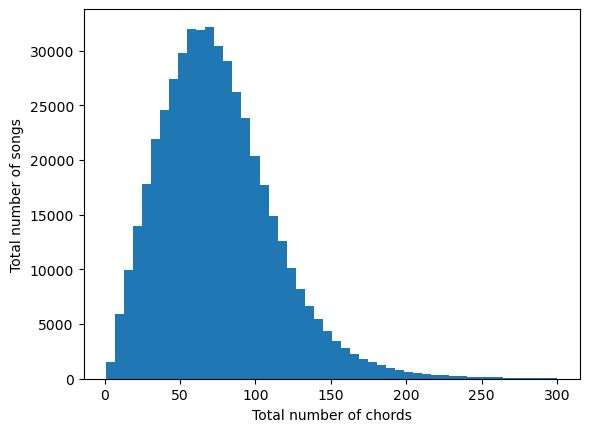

In [ ]:
tchords=df[df['tot_chords']<=300].tot_chords.value_counts()
print(tchords)
print(tchords.sum()) #accounts for more than 99.7% data
#plt.bar(tchords.index,uchords)
plt.hist(df[df['tot_chords']<=300]['tot_chords'],bins=50)
plt.xlabel('Total number of chords')
plt.ylabel('Total number of songs')
plt.show()